In [2]:
import pandas as pd

data_terminated = pd.read_csv("terminated_data.csv",index_col=["Unnamed: 0"])
data_employed = pd.read_csv("employed_data.csv", index_col=["Unnamed: 0"])

In [3]:
print(data_terminated[["PerfScore","AssColl", "AssSelf", "AssLead"]].mean())
print(data_employed[["PerfScore", "AssColl", "AssSelf", "AssLead"]].mean())
print(data_terminated[["PerfScore","AssColl", "AssSelf", "AssLead"]].std())
print(data_employed[["PerfScore", "AssColl", "AssSelf", "AssLead"]].std())
print(len(data_terminated), len(data_employed))

PerfScore    2.653846
AssColl      2.461538
AssSelf      2.500000
AssLead      2.490385
dtype: float64
PerfScore    3.135266
AssColl      3.135266
AssSelf      3.338164
AssLead      3.304348
dtype: float64
PerfScore    0.772956
AssColl      0.902242
AssSelf      0.995134
AssLead      0.995087
dtype: float64
PerfScore    0.830874
AssColl      0.898252
AssSelf      0.903952
AssLead      1.014042
dtype: float64
104 207


In [20]:
import scipy
import numpy as np

def test_difference(left, right, alpha):
    diff = left.mean() - right.mean()
    sd_l = left.std()
    sd_r = right.std()
    n_l = len(left)
    n_r = len(right)
    dof = n_l + n_r - 2

    t_stat = diff / np.sqrt(sd_l **2 / n_l + sd_r ** 2 / n_r)

    t_critical = scipy.stats.t.ppf(alpha/2, dof)
    print("H0: mean(x_l) - mean(x_r) = 0:", abs(t_stat) < t_critical, "\np-value:", round(2*scipy.stats.t.cdf(-abs(t_stat), dof), 5))

test_difference(data_terminated["PerfScore"], data_employed["PerfScore"], 0.05)
test_difference(data_terminated["AssColl"], data_employed["AssColl"], 0.05)
test_difference(data_terminated["AssSelf"], data_employed["AssSelf"], 0.05)
test_difference(data_terminated["AssLead"], data_employed["AssLead"], 0.05)

H0: mean(x_l) - mean(x_r) = 0: False 
p-value: 0.0
H0: mean(x_l) - mean(x_r) = 0: False 
p-value: 0.0
H0: mean(x_l) - mean(x_r) = 0: False 
p-value: 0.0
H0: mean(x_l) - mean(x_r) = 0: False 
p-value: 0.0


<AxesSubplot: >

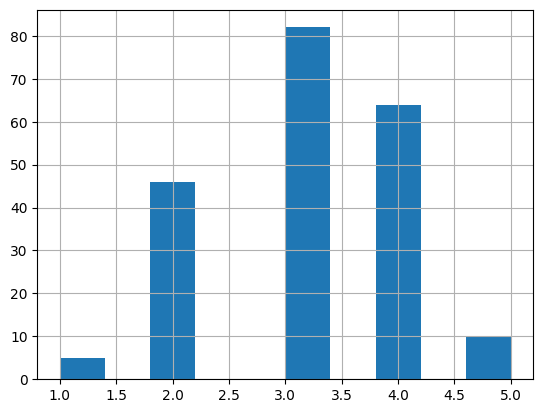

In [21]:
data_employed["AssColl"].hist()